In [1]:
from fly_analysis import braidz
from fly_analysis import filtering
from fly_analysis.processing import extract_stimulus_centered_data
import numpy as np
from matplotlib import pyplot as plt
from fly_analysis.plotting import plot_mean_and_std
from fly_analysis.plotting import plot_trajectory
from datetime import datetime
from scipy import stats
from scipy.stats import mannwhitneyu
from scipy.stats import wilcoxon
from scipy.stats import kruskal
from scipy.stats import friedmanchisquare
import pandas as pd

In [2]:
df, csvs = braidz.read_braidz(r"C:\\Users\\pandey\\Desktop\\Braidz Files\\20240915_140001.braidz")

Reading C:\\Users\\pandey\\Desktop\\Braidz Files\\20240915_140001.braidz using pyarrow


In [18]:
df,csvs["opto"]


dict

In [15]:
data = extract_stimulus_centered_data(df, csvs["opto"])
type(data)
list(data)


['angular_velocity', 'linear_velocity', 'position', 'timestamps']

In [20]:
# Inspect the structure of the dictionary
print("Keys in the dictionary:", data.keys())

# Print the first few entries to check the format of position values
for key, value in list(data.items())[:5]:  # Display only the first 5 entries
    print(f"Key: {key}, Value: {value}")


Keys in the dictionary: dict_keys(['angular_velocity', 'linear_velocity', 'position', 'timestamps'])
Key: angular_velocity, Value: [array([-2.19488280e+03, -1.14381708e+03, -5.64235712e+02, -2.20319419e+02,
        6.19422931e+01,  1.43478323e+02,  1.69383130e+02,  2.88589199e+02,
        3.27926779e+02,  2.48769045e+02,  1.89946979e+02,  2.87379207e+02,
        2.94222114e+02,  2.38269322e+02,  1.94926610e+02,  1.48229419e+02,
        1.59975448e+02,  1.57097546e+02,  1.38447030e+02,  1.23980242e+02,
        1.34896258e+02,  1.58770810e+02,  1.81272851e+02,  1.29789428e+02,
        7.92483523e+01,  3.17804151e+01,  4.25930363e+01,  2.66781099e+01,
       -3.28832569e+01,  5.98670901e-01,  1.36575206e+02,  2.00912004e+02,
        2.03379650e+01, -2.07140451e+02, -1.34967719e+02, -6.47771226e+01,
       -9.61185969e+01,  8.86387760e+01,  6.56146045e+01,  2.12570756e+01,
       -8.75873828e+01, -1.31769769e+02, -1.10898264e+01, -1.16633932e+02,
       -1.07940916e+02, -2.29395097e+01,  1

In [36]:
# Access the position values from the dictionary
angular_velocity = data.get("angular_velocity", None)  # Returns None if "Position" key doesn't exist



In [37]:
import numpy as np

# Assuming position_values is already extracted from the dictionary
angular_velocity = np.array(angular_velocity)

print("Shape of the angular_velocity array:", angular_velocity.shape)  # Check dimensions


Shape of the angular_velocity array: (69, 150)


In [24]:
# Compute statistics for each axis
mean_positions = np.mean(position_array, axis=0)
std_positions = np.std(position_array, axis=0)
min_positions = np.min(position_array, axis=0)
max_positions = np.max(position_array, axis=0)

print("Mean positions:", mean_positions)
print("Standard deviation:", std_positions)
print("Minimum positions:", min_positions)
print("Maximum positions:", max_positions)


Mean positions: [[ 2.08070312e-02 -7.09314010e-03  1.34038028e-01]
 [ 2.06784384e-02 -7.14241072e-03  1.34333156e-01]
 [ 2.05486887e-02 -7.20377313e-03  1.34637021e-01]
 [ 2.04119139e-02 -7.28374477e-03  1.34922068e-01]
 [ 2.02648759e-02 -7.35255852e-03  1.35258307e-01]
 [ 2.01227393e-02 -7.41734567e-03  1.35599167e-01]
 [ 1.99705309e-02 -7.50152748e-03  1.35934067e-01]
 [ 1.98087461e-02 -7.59344130e-03  1.36280928e-01]
 [ 1.96249329e-02 -7.68001133e-03  1.36606333e-01]
 [ 1.94535061e-02 -7.76199296e-03  1.36941242e-01]
 [ 1.92670222e-02 -7.82634665e-03  1.37268700e-01]
 [ 1.90536130e-02 -7.88101007e-03  1.37585968e-01]
 [ 1.88128598e-02 -7.90007536e-03  1.37897130e-01]
 [ 1.85622308e-02 -7.90729936e-03  1.38224502e-01]
 [ 1.82883363e-02 -7.90274523e-03  1.38528361e-01]
 [ 1.79893722e-02 -7.86556576e-03  1.38816686e-01]
 [ 1.76662252e-02 -7.79478429e-03  1.39074613e-01]
 [ 1.73246516e-02 -7.68796183e-03  1.39329485e-01]
 [ 1.69668658e-02 -7.56465180e-03  1.39551677e-01]
 [ 1.65968086e-

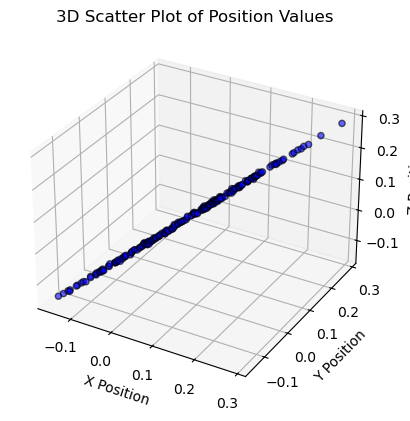

In [25]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(position_array[:, 0], position_array[:, 1], position_array[:, 2], alpha=0.6, c='b', edgecolor='k')
ax.set_title("3D Scatter Plot of Position Values")
ax.set_xlabel("X Position")
ax.set_ylabel("Y Position")
ax.set_zlabel("Z Position")
plt.show()


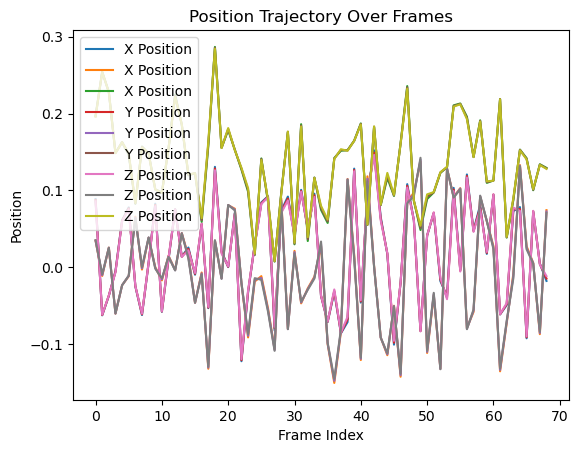

In [26]:
plt.plot(position_array[:, 0], label='X Position')
plt.plot(position_array[:, 1], label='Y Position')
plt.plot(position_array[:, 2], label='Z Position')
plt.title("Position Trajectory Over Frames")
plt.xlabel("Frame Index")
plt.ylabel("Position")
plt.legend()
plt.show()


In [28]:
# Define the ranges
ranges = [(0, 50), (50, 80), (80, 150)]
segmented_data = [position_array[:, start:end, :] for start, end in ranges]

# Print segment shapes for confirmation
for i, segment in enumerate(segmented_data):
    print(f"Range {ranges[i]} shape: {segment.shape}")



Range (0, 50) shape: (69, 50, 3)
Range (50, 80) shape: (69, 30, 3)
Range (80, 150) shape: (69, 70, 3)


In [29]:
from sklearn.preprocessing import StandardScaler

normalized_segments = []
for segment in segmented_data:
    # Reshape to 2D: (frames * samples, 3)
    reshaped_segment = segment.reshape(-1, 3)
    # Normalize
    normalized_segment = StandardScaler().fit_transform(reshaped_segment)
    normalized_segments.append(normalized_segment)
    print(f"Normalized segment for range {segment.shape}: first 5 points:\n{normalized_segment[:5]}")


Normalized segment for range (69, 50, 3): first 5 points:
[[1.59008861 0.76326539 1.34808234]
 [1.56074817 0.76507796 1.33331783]
 [1.52791519 0.77006847 1.31931052]
 [1.49407217 0.77679862 1.30588026]
 [1.46025735 0.78338362 1.2944496 ]]
Normalized segment for range (69, 30, 3): first 5 points:
[[1.17805682 0.7486573  1.35484543]
 [1.10383587 0.70457383 1.35182097]
 [1.03088774 0.65721263 1.34971288]
 [0.95853755 0.61072807 1.3481041 ]
 [0.88777725 0.5660888  1.34691689]]
Normalized segment for range (69, 70, 3): first 5 points:
[[ 0.39246438 -0.36579901  1.19015075]
 [ 0.39866262 -0.41634492  1.18591029]
 [ 0.40297543 -0.45940256  1.18116175]
 [ 0.40485268 -0.49384381  1.17444207]
 [ 0.40452142 -0.52025112  1.16660142]]


In [30]:
from sklearn.cluster import KMeans

num_clusters = 3
clusters = []

for i, segment in enumerate(normalized_segments):
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    labels = kmeans.fit_predict(segment)
    clusters.append(labels)
    print(f"Clusters for range {ranges[i]}: first 10 labels:\n{labels[:10]}")


Clusters for range (0, 50): first 10 labels:
[1 1 1 1 1 1 1 1 1 1]
Clusters for range (50, 80): first 10 labels:
[0 0 0 0 0 0 0 0 0 0]
Clusters for range (80, 150): first 10 labels:
[2 2 2 2 2 2 2 2 2 2]


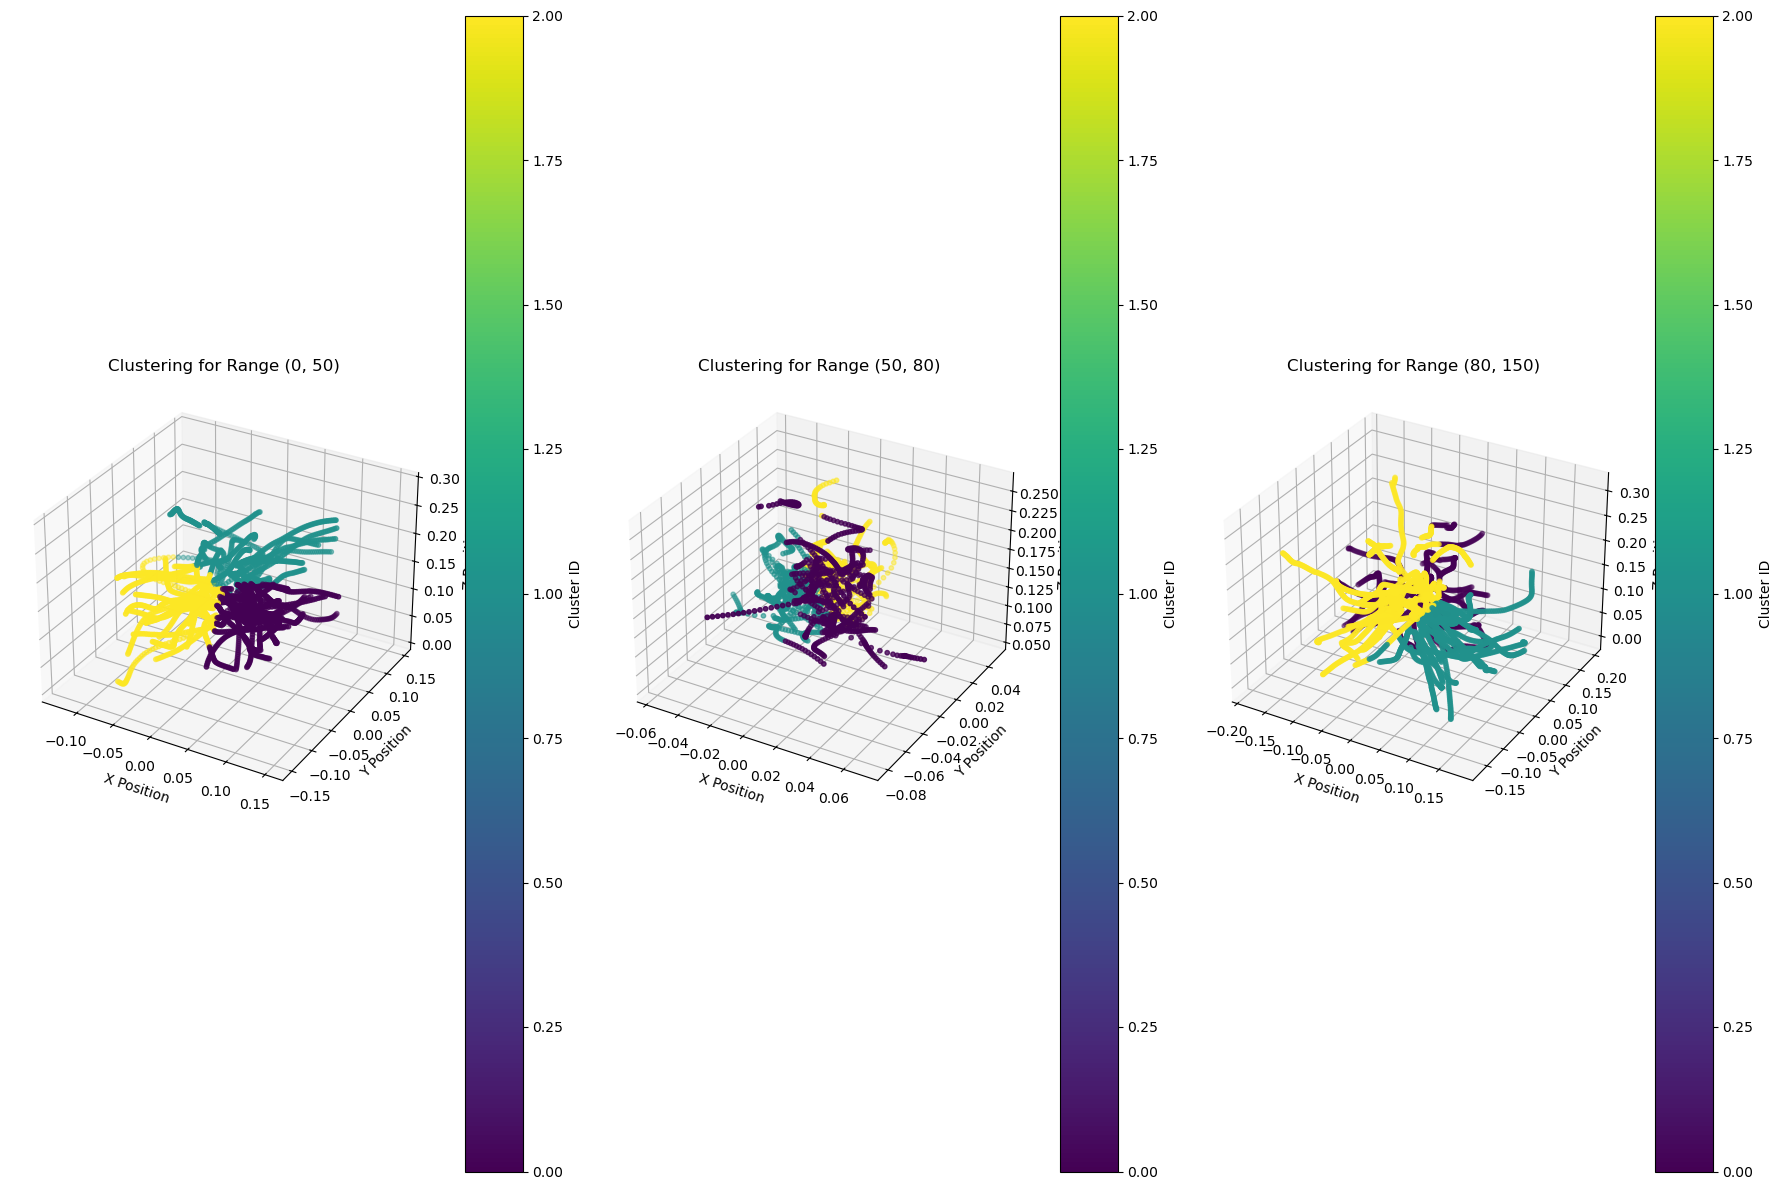

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

# Define the ranges
ranges = [(0, 50), (50, 80), (80, 150)]

# Segment the data into these ranges
segmented_data = [position_array[:, start:end, :] for start, end in ranges]

# Normalize and reshape each segment for clustering
normalized_segments = []
for segment in segmented_data:
    # Reshape to 2D: (frames * samples, 3)
    reshaped_segment = segment.reshape(-1, 3)
    # Normalize
    normalized_segment = StandardScaler().fit_transform(reshaped_segment)
    normalized_segments.append(normalized_segment)

# Apply KMeans clustering for each range
num_clusters = 3
clusters = []

for i, segment in enumerate(normalized_segments):
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    labels = kmeans.fit_predict(segment)
    clusters.append(labels)

# Plot the clustering results for each range
fig = plt.figure(figsize=(18, 12))

# Iterate over the ranges and plot
for i in range(len(ranges)):
    ax = fig.add_subplot(1, 3, i+1, projection='3d')
    
    # Get the normalized segment and corresponding cluster labels
    segment = segmented_data[i].reshape(-1, 3)
    labels = clusters[i]
    
    # Scatter plot: color by cluster labels
    scatter = ax.scatter(segment[:, 0], segment[:, 1], segment[:, 2], c=labels, cmap='viridis', s=10)
    
    # Set plot titles and labels
    ax.set_title(f"Clustering for Range {ranges[i]}")
    ax.set_xlabel('X Position')
    ax.set_ylabel('Y Position')
    ax.set_zlabel('Z Position')
    
    # Add color bar
    fig.colorbar(scatter, ax=ax, label='Cluster ID')

plt.tight_layout()
plt.show()


In [32]:
print("Centroids of the clusters:")
print(kmeans.cluster_centers_)


Centroids of the clusters:
[[-0.54331647  1.01371324 -0.43073887]
 [ 1.09761917 -0.46532932 -0.40364712]
 [-0.38812389 -0.46174561  0.64683288]]


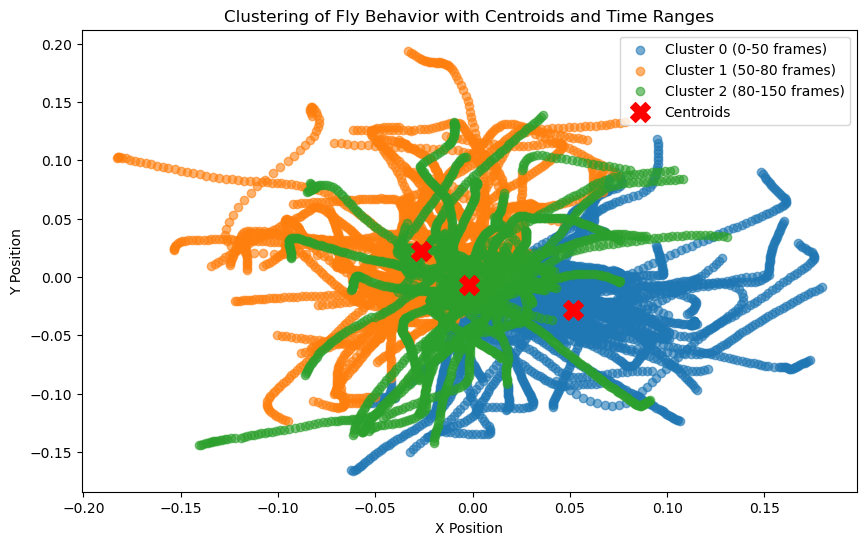

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Assuming position_array is of shape (69, 150, 3)

# Reshape the position array into a 2D array (number of frames, 3 position values)
reshaped_positions = position_array.reshape(-1, 3)

# Perform KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(reshaped_positions)

# Get the cluster labels
labels = kmeans.labels_

# Reshape labels back to the original shape of position_array
labels_reshaped = labels.reshape(position_array.shape[0], position_array.shape[1])

# Extract cluster centroids
centroids = kmeans.cluster_centers_

# Define time ranges for the frames (as an example)
time_ranges = [(0, 50), (50, 80), (80, 150)]

# Create a figure for the plot
plt.figure(figsize=(10, 6))

# Plot all points with their assigned cluster color
for i in range(3):  # Iterate through the three clusters
    # Find the indices of points that belong to cluster i
    cluster_points = reshaped_positions[labels == i]
    
    # Plot these points with the corresponding color
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], 
                label=f"Cluster {i} ({time_ranges[i][0]}-{time_ranges[i][1]} frames)",
                alpha=0.6)

# Plot centroids with red 'X'
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', marker='X', label='Centroids')

# Add labels and title
plt.xlabel("X Position")
plt.ylabel("Y Position")
plt.title("Clustering of Fly Behavior with Centroids and Time Ranges")
plt.legend()

# Show plot
plt.show()


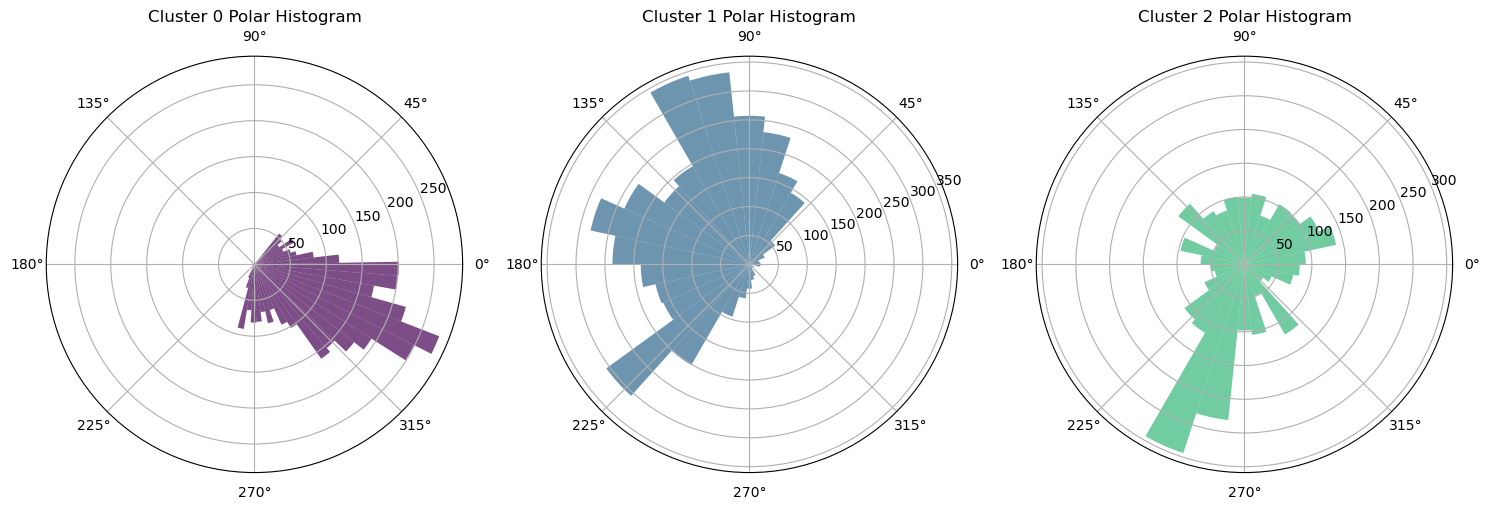

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Assuming position_array is of shape (69, 150, 3)

# Reshape the position array into a 2D array (number of frames, 3 position values)
reshaped_positions = position_array.reshape(-1, 3)

# Perform KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(reshaped_positions)

# Get the cluster labels
labels = kmeans.labels_

# Extract polar coordinates (angle and radius)
x = reshaped_positions[:, 0]
y = reshaped_positions[:, 1]

# Convert to polar coordinates (angle in radians, radius)
angles = np.arctan2(y, x)
radii = np.sqrt(x**2 + y**2)

# Set up a figure with subplots for each cluster's polar histogram
fig, ax = plt.subplots(1, 3, figsize=(15, 5), subplot_kw={'projection': 'polar'})

# Plot a polar histogram for each cluster
for i in range(3):
    # Get the indices of points in cluster i
    cluster_indices = np.where(labels == i)[0]
    
    # Extract the angles for the points in this cluster
    cluster_angles = angles[cluster_indices]
    
    # Plot the polar histogram for this cluster
    ax[i].hist(cluster_angles, bins=30, color=plt.cm.viridis(i / 3), alpha=0.7)
    ax[i].set_title(f"Cluster {i} Polar Histogram")
    
# Show the plot
plt.tight_layout()
plt.show()


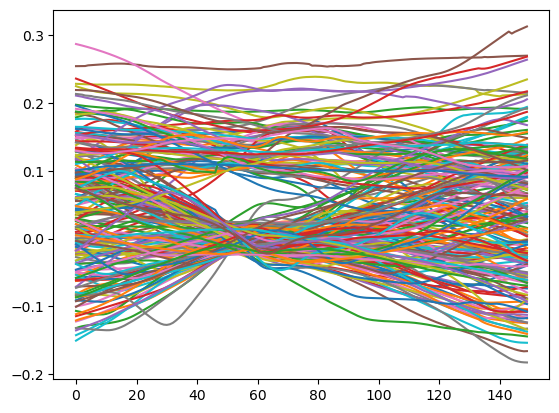

In [19]:
fig = plt.figure()
for p in data["position"]:
    plt.plot(p)
plt.show()

In [5]:
median_obj_id = filtering.filter_by_median_position(df, xlim=[-0.2, 0.2], ylim=[-0.2, 0.2], zlim=[0.1, 0.3])
duration_obj_id = filtering.filter_by_duration(df, threshold=5)

shared_elements = set(median_obj_id) & set(duration_obj_id)
shared_elements

{127,
 171,
 416,
 420,
 1717,
 1722,
 1813,
 1820,
 1945,
 2886,
 4171,
 5022,
 10631,
 15846,
 18848,
 25389,
 25486,
 31088,
 48471,
 76169,
 79758,
 85549,
 92568,
 100650,
 118710,
 120299,
 121406,
 134555,
 135625,
 138170,
 157832,
 158276,
 165526,
 165777,
 168214,
 182494,
 189530,
 196471,
 199255,
 200620,
 201478,
 203722,
 204975,
 207353,
 219849,
 220808,
 229584,
 235805}

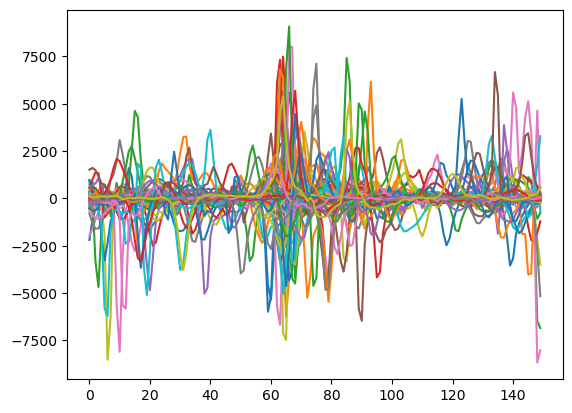

In [6]:
fig = plt.figure()
for d in data["angular_velocity"]:
    plt.plot(d)
plt.show()

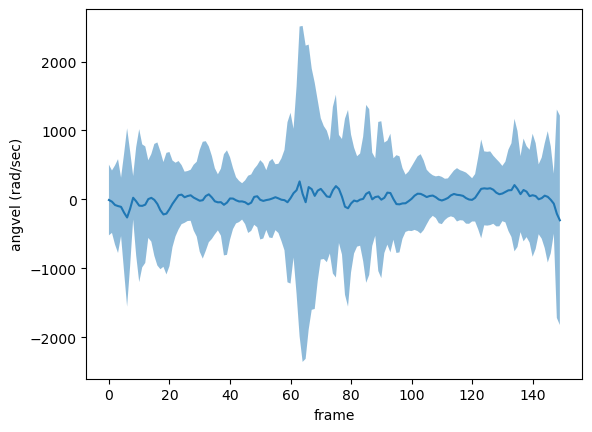

In [7]:
fig, ax = plt.subplots()
plot_mean_and_std(np.array(data["angular_velocity"]), ax=ax)
ax.set_xlabel("frame")
ax.set_ylabel("angvel (rad/sec)")
plt.show()

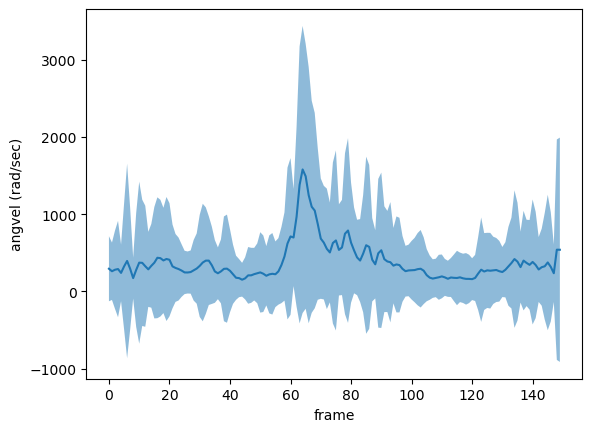

In [8]:
fig, ax = plt.subplots()
plot_mean_and_std(np.abs(np.array(data["angular_velocity"])), ax=ax)
ax.set_xlabel("frame")
ax.set_ylabel("angvel (rad/sec)")
plt.show()

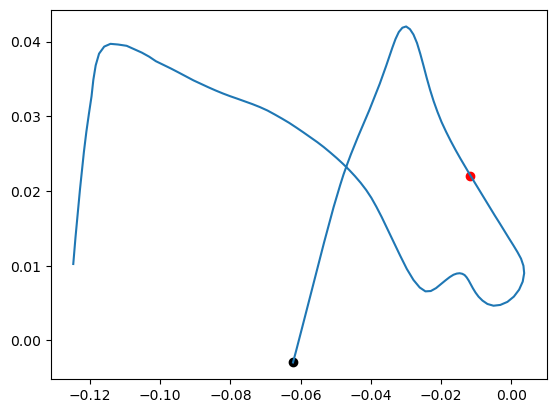

In [9]:
i = 7
traj = data["position"][i]

fig = plt.figure()
plt.plot(traj[:,0], traj[:,1])
plt.scatter(traj[50,0], traj[50,1], color="red")
plt.scatter(traj[0,0], traj[0,1], color="black")
plt.show()

In [10]:
data1_max = np.max(np.abs(np.asarray(data["angular_velocity"])[:, 50:80]), axis=1)

In [11]:
mean_data = np.mean(data1_max)
print(mean_data)
std_dev = np.std(data1_max, ddof=1)  
std_error = std_dev / np.sqrt(len(data1_max))
print(f"Standard Deviation of data1_max: {std_dev:.4f}")
print(f"Standard Error of data1_max: {std_error:.4f}")

3584.1483369845546
Standard Deviation of data1_max: 2271.9775
Standard Error of data1_max: 273.5140


In [12]:
print(f"Shape of data1_max: {data1_max.shape}")
flattened_data = data1_max.ravel()
print(f"Shape of flattened data: {flattened_data.shape}")
k2, p_value = stats.normaltest(flattened_data)
print(f"D'Agostino's K-squared Test Statistic: {k2}")
print(f"P-value: {p_value}")

Shape of data1_max: (69,)
Shape of flattened data: (69,)
D'Agostino's K-squared Test Statistic: 5.486708760889053
P-value: 0.06435411624692922
